#  Assignment #2.

I pledge on my honor that I have not given or received any unauthorized assistance on this assignment/examination. I further pledge that I have not copied any material from a book, article, the Internet or any other source except where I have expressly cited the source.

By filling out the following fields, you are signing this pledge. No assignment will get credit without being pledged.

Name: Beatrice Spinola

CWID: 20012606

Date: 02/24/2022

# Instructions
In this assignment, you should use this Jupyter notebook to answer the questions below. Simply type your code into embedded chunks.

For all the programming homeworks, you should submit a report as a Jupyter notebook organized by questions, with the proper explanation for every answer, and saved as 1). an HTML or pdf file. It might be easier to generate an HTML file than a pdf file. 2). Notebook file with the extension .ipynb. From the file menu of the Jupyter notebook, you can download the PDF or HTML and ipynb files as: File --> Download as:

If you want to improve your homework, you can resubmit it until the deadline.

# Question 1 
You are part of a research team of a FinTech company dedicated to forecast the price direction of public US companies. Using the dataset at VTIreturns.csv, you must build a forecasting model of the VTI (market index)'s next day's return (ret) and its direction using the years 2015-2019 to train and 2020-2021 to test your model. 

The file VTIreturns.csv includes the following variables:

ret: Vanguard Total Stock Market ETF daily return based on adjusted daily closing prices.

Lag1-Lag5: LagX is X-lagged value of ret

5 factors of the Fama French model:

RM-Rf : market return minus risk free rate (market risk premium)

SMB: Small Minus Big (firm size): difference of average return on 9 small and 9 big stock portfolios

HML: High Minus Low (value): difference of average return on 2 value and 2 growth portfolios 

RMW (Robust Minus Weak):  difference of average return on 2 robust and 2 weak operating profitability portfolios 

CMA (Conservative Minus Aggressive):  difference of average return on 2 conservative and 2 aggressive investment portfolios

For this exercise you do not need to know the details of the Fama French model. However, further details and data can be obtained at:
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html




## 1.  Read this csv file. Sort the variables by date in a new dataset. List the names of the variables in the dataset.


In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import itertools

import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import time
import itertools
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

In [2]:
# Reading the csv file
df = pd.read_csv(r'C:\Users\beasp\Downloads\VTIreturns.csv')[["Date", "ret", "RM-Rf", "SMB", "HML", "RMW", "CMA", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5"]].dropna()
df = df.rename(columns={'RM-Rf': 'RM_Rf'})

In [3]:
# Convert object type to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Sort the variables by date in a new dataset
df.sort_values(by = 'Date', inplace = True)
df.head()

,Date,ret,RM_Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5
0,2015-08-17,0.635918,0.60,0.36,-0.85,-0.22,-0.37,0.379802,-0.139131,0.102001,-0.905078,1.239611
1,2015-08-18,-0.257553,-0.35,-0.61,0.37,0.37,0.03,0.635918,0.379802,-0.139131,0.102001,-0.905078
2,2015-08-19,-0.897452,-0.85,-0.20,-0.21,-0.10,-0.03,-0.257553,0.635918,0.379802,-0.139131,0.102001
3,2015-08-20,-2.198697,-2.24,-0.23,0.56,0.63,0.53,-0.897452,-0.257553,0.635918,0.379802,-0.139131
4,2015-08-21,-2.920836,-2.95,1.80,0.16,-0.73,0.74,-2.198697,-0.897452,-0.257553,0.635918,0.379802


In [4]:
# List the names of the variables in the dataset
list(df)

['Date',
 'ret',
 'RM_Rf',
 'SMB',
 'HML',
 'RMW',
 'CMA',
 'Lag1',
 'Lag2',
 'Lag3',
 'Lag4',
 'Lag5']

## 2. Generate a new variable ret1 which is the return of the next day and ret_sq which is squared of ret. 



In [5]:
# Calculate the return of the next day
df["ret1"] = df["ret"].shift(-1)
df.ret1.drop(1538)

0      -0.257553
1      -0.897452
2      -2.198697
3      -2.920836
4      -4.103392
          ...   
1533    0.119389
1534   -0.217969
1535   -2.117043
1536    0.066844
1537   -1.088358
Name: ret1, Length: 1538, dtype: float64

In [6]:
# Calculate the squared of the return
df['ret_sq'] = df['ret'] ** 2
df.head()

,Date,ret,RM_Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,ret_sq
0,2015-08-17,0.635918,0.60,0.36,-0.85,-0.22,-0.37,0.379802,-0.139131,0.102001,-0.905078,1.239611,-0.257553,0.404392
1,2015-08-18,-0.257553,-0.35,-0.61,0.37,0.37,0.03,0.635918,0.379802,-0.139131,0.102001,-0.905078,-0.897452,0.066334
2,2015-08-19,-0.897452,-0.85,-0.20,-0.21,-0.10,-0.03,-0.257553,0.635918,0.379802,-0.139131,0.102001,-2.198697,0.805420
3,2015-08-20,-2.198697,-2.24,-0.23,0.56,0.63,0.53,-0.897452,-0.257553,0.635918,0.379802,-0.139131,-2.920836,4.834270
4,2015-08-21,-2.920836,-2.95,1.80,0.16,-0.73,0.74,-2.198697,-0.897452,-0.257553,0.635918,0.379802,-4.103392,8.531286


## 3. What is the mean and standard deviation of each variable? Create a simple table of the means and standard deviations.



In [7]:
mean = df.mean()
std = df.std()
table = pd.DataFrame({'Mean':mean, 'Std': std})
table

C:\Users\beasp\AppData\Local\Temp\ipykernel_17020\165910018.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = df.mean()


,Mean,Std
CMA,-0.004418,0.394264
Date,NaN,646 days 13:26:04.246664456
HML,-0.017186,0.907731
Lag1,0.055126,1.177481
Lag2,0.054993,1.177492
Lag3,0.056435,1.176188
Lag4,0.055988,1.176423
Lag5,0.056716,1.176808
RMW,0.009461,0.455677
RM_Rf,0.056615,1.189073


## 4. Explore the distribution of the main variables of this dataset and the relationship with the variable return using graphs and/or statistical values. Discuss your results



In [8]:
# Display number of rows and columns
df.shape

(1539, 14)

In [9]:
# Showing Basics Statistics
df.describe()

,ret,RM_Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,ret_sq
count,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1538.000000,1539.000000
mean,0.054173,0.056615,0.000884,-0.017186,0.009461,-0.004418,0.055126,0.054993,0.056435,0.055988,0.056716,0.053794,1.389276
std,1.177813,1.189073,0.695138,0.907731,0.455677,0.394264,1.177481,1.177492,1.176188,1.176423,1.176808,1.178102,6.388202
min,-12.082221,-12.000000,-4.570000,-4.950000,-1.820000,-2.290000,-12.082221,-12.082221,-12.082221,-12.082221,-12.082221,-12.082221,0.000000
25%,-0.315907,-0.340000,-0.380000,-0.450000,-0.260000,-0.230000,-0.314130,-0.314130,-0.309273,-0.314130,-0.314130,-0.316073,0.032625
50%,0.078330,0.080000,-0.020000,-0.050000,0.000000,-0.020000,0.079878,0.079878,0.080282,0.080282,0.080282,0.078033,0.197693
75%,0.567944,0.580000,0.380000,0.390000,0.265000,0.200000,0.567944,0.567944,0.567944,0.567944,0.568730,0.567123,0.860239
max,9.066106,9.340000,5.740000,6.750000,1.920000,2.460000,9.066106,9.066106,9.066106,9.066106,9.066106,9.066106,145.980066


C:\Users\beasp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


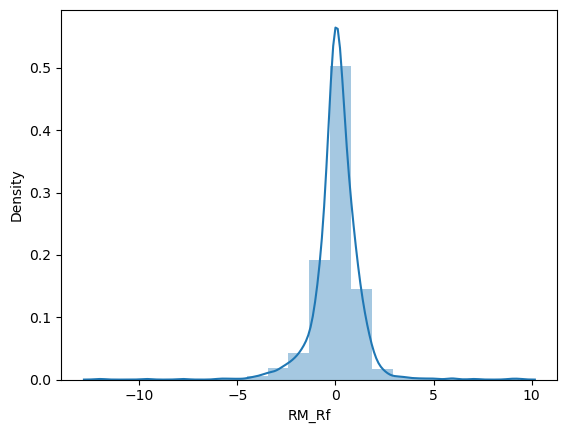

In [10]:
sns.distplot(df["RM_Rf"], bins=20)
plt.show()

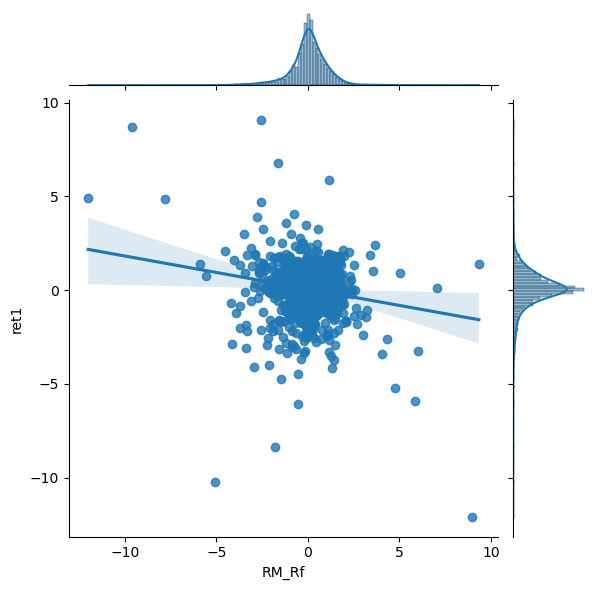

In [11]:
sns.jointplot(x="RM_Rf", y="ret1", data=df, kind="reg")

<AxesSubplot:xlabel='RMW', ylabel='ret1'>

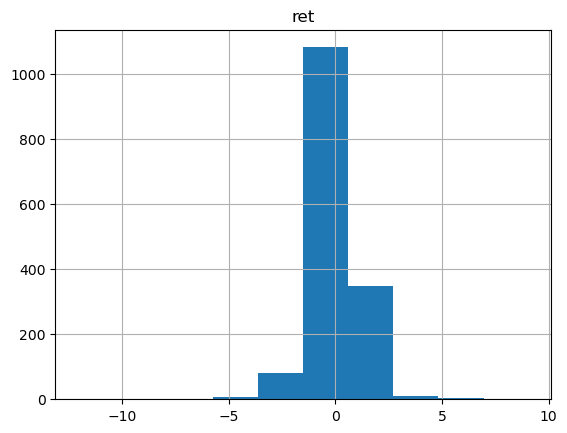

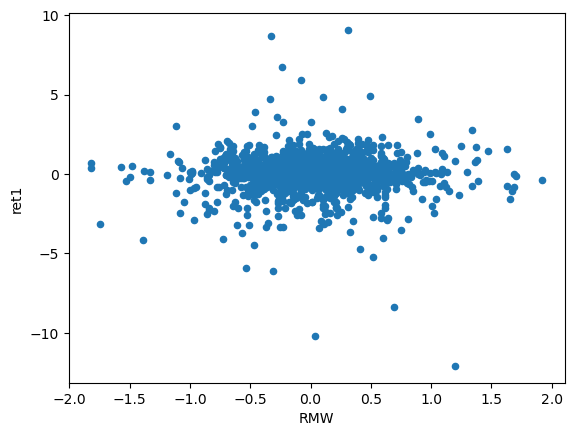

In [12]:
df.hist("ret")
df.plot(kind="scatter", x="RMW", y="ret1")

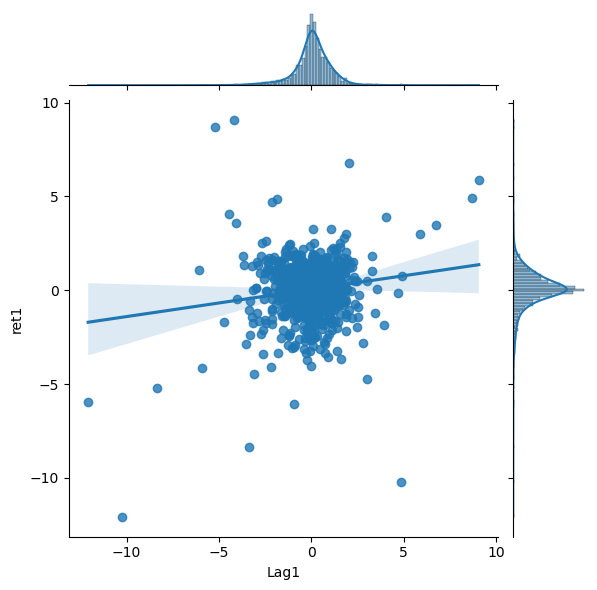

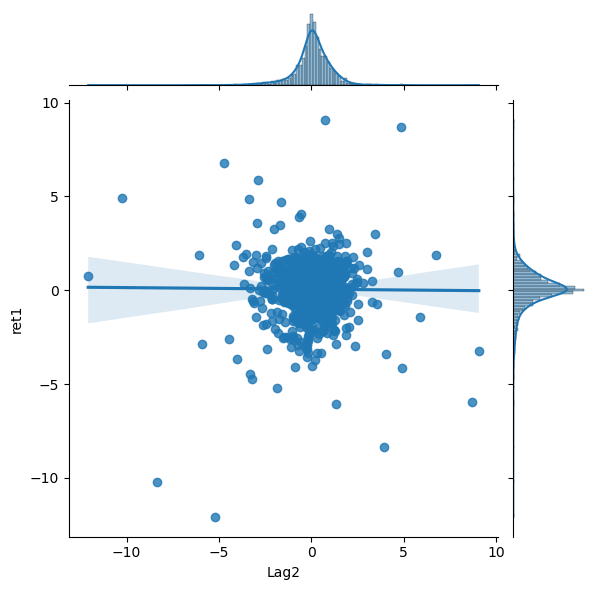

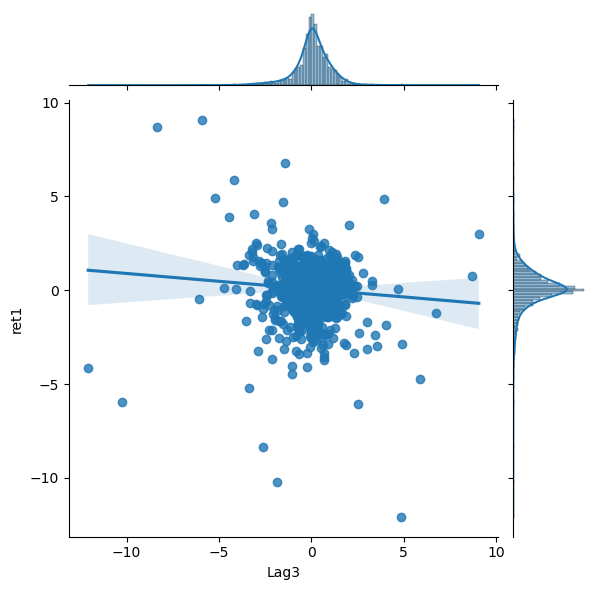

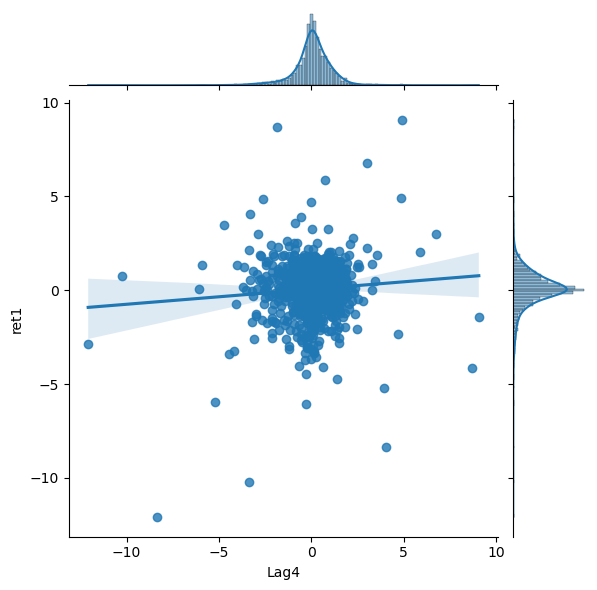

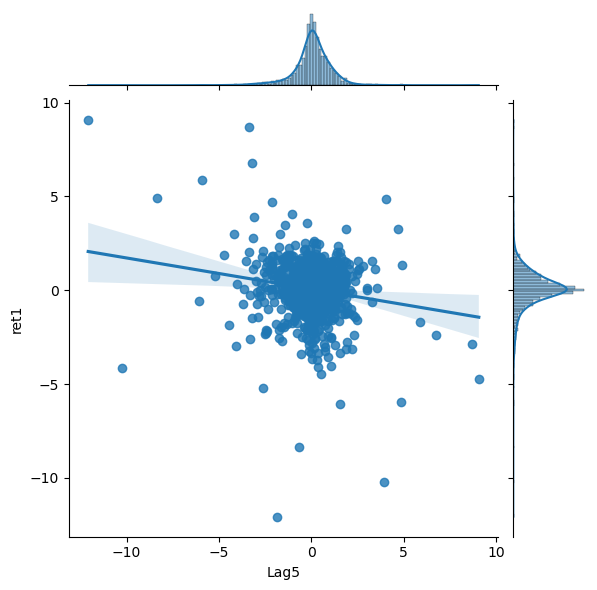

In [13]:
for col in ["Lag1", "Lag2", "Lag3", "Lag4", "Lag5"]:
    sns.jointplot(x=col, y="ret1", data=df, kind="reg")
    plt.show()

## 5.a  Split your data into a training set (until 2019) and a testing set (2020-21). Using the training sample, regress next day return on the remaining variables (removing DATE).

In [14]:
# Split the data into training (until 2019) and testing (2020-21) sets
train_df = df[df['Date'].dt.year < 2020]
test_df = df[df['Date'].dt.year >= 2020]

# Define the predictor variables and the response variable
predictors = [col for col in df.columns if col != 'Date' and col != 'ret1']
response = 'ret1'

# Split the data into X_train, y_train, X_test, y_test
X_train = train_df[predictors]
y_train = train_df[response]
X_test = test_df[predictors]
y_test = test_df[response]

In [15]:
X_test

,ret,RM_Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret_sq
1102,0.827751,0.86,-0.97,-0.32,0.24,-0.22,0.263152,-0.543915,-0.091350,0.482184,0.022038,0.685172
1103,-0.638480,-0.67,0.30,0.00,-0.14,-0.11,0.827751,0.263152,-0.543915,-0.091350,0.482184,0.407656
1104,0.341056,0.36,-0.21,-0.54,-0.17,-0.26,-0.638480,0.827751,0.263152,-0.543915,-0.091350,0.116319
1105,-0.237391,-0.19,-0.03,-0.25,-0.13,-0.25,0.341056,-0.638480,0.827751,0.263152,-0.543915,0.056354
1106,0.492372,0.47,-0.17,-0.65,-0.19,-0.17,-0.237391,0.341056,-0.638480,0.827751,0.263152,0.242430
...,...,...,...,...,...,...,...,...,...,...,...,...
1534,0.119389,0.08,-0.39,0.70,0.62,0.23,1.211179,1.003614,-0.008889,-1.748518,-0.804474,0.014254
1535,-0.217969,-0.10,1.73,2.39,-0.27,0.76,0.119389,1.211179,1.003614,-0.008889,-1.748518,0.047511
1536,-2.117043,-2.18,0.01,1.75,0.84,1.07,-0.217969,0.119389,1.211179,1.003614,-0.008889,4.481869
1537,0.066844,0.03,-0.18,0.80,1.15,0.35,-2.117043,-0.217969,0.119389,1.211179,1.003614,0.004468


In [16]:
# Fit a linear regression model on the training data
model = sm.OLS(train_df[response], train_df[predictors]).fit()

# Print the summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   ret1   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.051
Date:                Sun, 26 Feb 2023   Prob (F-statistic):                       0.399
Time:                        16:59:01   Log-Likelihood:                         -1395.9
No. Observations:                1102   AIC:                                      2816.
Df Residuals:                    1090   BIC:                                      2876.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
# perform a linear regression on the training set
model = LinearRegression().fit(X_train, y_train)

# print the model coefficients
print('Coefficients:', model.coef_)

# print the model intercept
print('Intercept:', model.intercept_)

Coefficients: [ 9.64034637e-01 -9.58480362e-01  6.73888925e-02 -3.92112821e-02
  2.08140620e-02 -6.74701100e-02 -4.10363538e-02  2.25785634e-02
 -4.05538205e-02 -2.65450444e-02 -3.12911592e-04  8.57356144e-03]
Intercept: 0.04322887268873554


### b. Print a table showing what variables would be selected using best subset selection (minimizing RSS) for all predictors of the training set. Determine the optimal model using Mallows' Cp and output the model, including its coefficients.



In [22]:
print("Dimensions of original data:", df.shape)

# Drop any rows the contain missing values
new_df = df.dropna()

# Print the dimensions of the modified data 
print("Dimensions of modified data:", new_df.shape)

Dimensions of original data: (1539, 14)
Dimensions of modified data: (1538, 14)


In [23]:
X = clean_df.loc[:, ~clean_df.columns.isin(['ret1', 'Date'])]
Y = clean_df.loc[:, 'ret1']
clean_df

,Date,ret,RM_Rf,SMB,HML,RMW,CMA,Lag1,Lag2,Lag3,Lag4,Lag5,ret1,ret_sq
0,2015-08-17,0.635918,0.60,0.36,-0.85,-0.22,-0.37,0.379802,-0.139131,0.102001,-0.905078,1.239611,-0.257553,0.404392
1,2015-08-18,-0.257553,-0.35,-0.61,0.37,0.37,0.03,0.635918,0.379802,-0.139131,0.102001,-0.905078,-0.897452,0.066334
2,2015-08-19,-0.897452,-0.85,-0.20,-0.21,-0.10,-0.03,-0.257553,0.635918,0.379802,-0.139131,0.102001,-2.198697,0.805420
3,2015-08-20,-2.198697,-2.24,-0.23,0.56,0.63,0.53,-0.897452,-0.257553,0.635918,0.379802,-0.139131,-2.920836,4.834270
4,2015-08-21,-2.920836,-2.95,1.80,0.16,-0.73,0.74,-2.198697,-0.897452,-0.257553,0.635918,0.379802,-4.103392,8.531286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,2021-09-23,1.211179,1.28,0.46,0.91,-0.98,0.22,1.003614,-0.008889,-1.748518,-0.804474,-0.090916,0.119389,1.466953
1534,2021-09-24,0.119389,0.08,-0.39,0.70,0.62,0.23,1.211179,1.003614,-0.008889,-1.748518,-0.804474,-0.217969,0.014254
1535,2021-09-27,-0.217969,-0.10,1.73,2.39,-0.27,0.76,0.119389,1.211179,1.003614,-0.008889,-1.748518,-2.117043,0.047511
1536,2021-09-28,-2.117043,-2.18,0.01,1.75,0.84,1.07,-0.217969,0.119389,1.211179,1.003614,-0.008889,0.066844,4.481869


In [24]:
def getBest(k):
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [25]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(np.array(Y), X[list(feature_set)].to_numpy())
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)].to_numpy()) - np.array(Y)) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [26]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,12):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 12 models on 1 predictors in 0.0669853687286377 seconds.
Processed 66 models on 2 predictors in 0.7042992115020752 seconds.
Processed 220 models on 3 predictors in 4.247143507003784 seconds.
Processed 495 models on 4 predictors in 9.686793565750122 seconds.
Processed 792 models on 5 predictors in 15.835834980010986 seconds.
Processed 924 models on 6 predictors in 16.308518171310425 seconds.
Processed 792 models on 7 predictors in 14.887516260147095 seconds.
Processed 495 models on 8 predictors in 7.09640908241272 seconds.
Processed 220 models on 9 predictors in 5.8180601596832275 seconds.
Processed 66 models on 10 predictors in 1.853865146636963 seconds.
Processed 12 models on 11 predictors in 0.3517918586730957 seconds.
Total elapsed time: 77.21618247032166 seconds.


In [27]:
models_best

,RSS,model
1,2071.568908,<statsmodels.regression.linear_model.Regressio...
2,2024.231477,<statsmodels.regression.linear_model.Regressio...
3,1999.328276,<statsmodels.regression.linear_model.Regressio...
4,1986.026517,<statsmodels.regression.linear_model.Regressio...
5,1976.808849,<statsmodels.regression.linear_model.Regressio...
6,1970.515032,<statsmodels.regression.linear_model.Regressio...
7,1968.231439,<statsmodels.regression.linear_model.Regressio...
8,1966.863397,<statsmodels.regression.linear_model.Regressio...
9,1965.001184,<statsmodels.regression.linear_model.Regressio...
10,1963.476254,<statsmodels.regression.linear_model.Regressio...


In [28]:
print(models_best.loc[11, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.075
Method:                 Least Squares   F-statistic:                              12.39
Date:                Sun, 26 Feb 2023   Prob (F-statistic):                    1.12e-22
Time:                        17:04:58   Log-Likelihood:                         -2369.8
No. Observations:                1538   AIC:                                      4762.
Df Residuals:                    1527   BIC:                                      4820.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
models_best.loc[11, "model"].rsquared

0.08195165390620507

In [30]:
X = df.iloc[:, 1:14]
y = df.iloc[:, -1]

m = len(y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(models_best['RSS'])
models_best['numb_features'] = models_best.index
models_best['C_p'] = (1/m) * (models_best['RSS'] + 2 * models_best['numb_features'] * hat_sigma_squared )

In [31]:
models_best.loc[6,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.078
Model:                            OLS   Adj. R-squared (uncentered):              0.075
Method:                 Least Squares   F-statistic:                              21.66
Date:                Sun, 26 Feb 2023   Prob (F-statistic):                    1.51e-24
Time:                        17:04:58   Log-Likelihood:                         -2372.9
No. Observations:                1538   AIC:                                      4758.
Df Residuals:                    1532   BIC:                                      4790.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1528      0.025     -6.000      0.000      -0.203      -0.103
x2             0.1496      0.045      3.289      0.001       0.060       0.239
x3            -0.0761      0.034     -2.212      0.027      -0.144      -0.009
x4             0.1226      0.025      4.838      0.000       0.073       0.172
x5            -0.0737      0.025     -2.919      0.004      -0.123      -0.024
x6            -0.1308      0.025     -5.224      0.000      -0.180      -0.082
==============================================================================
Omnibus:                      652.458   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14455.493
Skew:                          -1.449   Prob(JB):                         0.00
Kurtosis:                      17.737   Cond. No.                         2.22
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### c. Print a table showing what variables would be selected using forward subset selection (minimizing RSS) for all predictors of the training set. Determine the optimal model using BIC and output the model, including its coefficients.



In [32]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

### d. Print a table showing what variables would be selected using backward subset selection (minimizing RSS) for all predictors of the training set. Determine the optimal model using R^2 and output the model, including its coefficients.



In [33]:
models_best.apply(lambda row: row[1].rsquared, axis=1)

1     0.030932
2     0.053076
3     0.064725
4     0.070948
5     0.075260
6     0.078204
7     0.079272
8     0.079912
9     0.080784
10    0.081497
11    0.081952
dtype: float64

## 6.a.  Using the training sample, fit a Ridge regression model with all the variables to forecast excess return.  Create a graph with the diferent values of lambda and the coefficients. Fit a Ridge regression model with a 10-fold cross-validation to choose the tuning parameter lambda. Print the value of the coefficients. Using the best lambda and the test sample, predict next day excess return and calculate the mean squared error.



In [34]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
ridge = Ridge(alpha=4, normalize=True)
# Fit a ridge regression on the training data
ridge.fit(X_train, y_train)             
# Use this model to predict the test data
pred = ridge.predict(X_test)           
# Print coefficients
print(pd.DataFrame(ridge.coef_, index=X_test.columns))
# Calculate the test MSE
print(mean_squared_error(y_test, pred))

               0
ret    -0.000750
RM_Rf  -0.001450
SMB     0.007842
HML    -0.011251
RMW     0.003955
CMA    -0.013324
Lag1   -0.007950
Lag2    0.004833
Lag3   -0.008255
Lag4   -0.005732
Lag5    0.001564
ret_sq  0.001670


C:\Users\beasp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

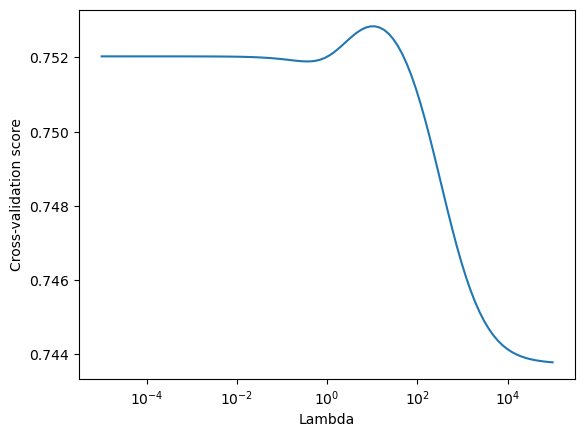

Best lambda: 100000.0
Coefficients: [-2.86091614e-05 -5.23228969e-05  1.08473693e-04 -2.16114517e-04
  2.48162404e-05 -9.83940346e-05 -3.32017979e-04  1.95556937e-04
 -3.40547307e-04 -2.36942031e-04  7.21241178e-05  3.24180338e-04]


In [35]:
from sklearn.model_selection import cross_val_score
# Set up a range of values for lambda
lambdas = np.logspace(-5, 5, 100)

# Initialize an empty array to store the cross-validation scores
cv_scores = []

# Loop over the different values of lambda and calculate the cross-validation score for each
for lam in lambdas:
    ridge = Ridge(alpha=lam)
    scores = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-np.mean(scores))

# Plot the cross-validation scores as a function of lambda
plt.plot(lambdas, cv_scores)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation score')
plt.show()

# Choose the value of lambda that minimizes the cross-validation score
best_lambda = lambdas[np.argmin(cv_scores)]
print('Best lambda:', best_lambda)

# Fit the Ridge regression model with the best lambda to the training data
ridge = Ridge(alpha=best_lambda)
ridge.fit(X_train, y_train)

# Print the coefficients of the Ridge regression model
print('Coefficients:', ridge.coef_)

### b. Fit a Lasso regression model with a 10-fold cross-validation to choose the tuning parameter lambda. Print the value of the coefficients. Using the best lambda and the test sample, predict next day excess return and calculate the mean squared error.



In [36]:
# Fit a Lasso regression model with 10-fold cross-validation to choose the tuning parameter lambda
lasso = LassoCV(cv=10, random_state=0).fit(X_train, y_train)

# Print the coefficients of the Lasso regression model
print('Coefficients:', lasso.coef_)

# Print the value of the best lambda
print('Best lambda:', lasso.alpha_)

# Predict the next day excess return using the Lasso regression model with the best lambda on the test set
y_pred = lasso.predict(X_test)

# Calculate the mean squared error of the predictions
mse = np.mean((y_test - y_pred) ** 2)
print('Mean squared error:', mse)

Coefficients: [-0.0000000e+00 -0.0000000e+00  0.0000000e+00 -0.0000000e+00
  0.0000000e+00 -0.0000000e+00 -0.0000000e+00  0.0000000e+00
 -1.7346093e-17 -0.0000000e+00  0.0000000e+00  0.0000000e+00]
Best lambda: 0.0312221129472651
Mean squared error: 3.0127536681079636


### c. Compare and discuss the results of Lasso and Ridge regression indicating what approach you will choose and why.


We used both Ridge and Lasso regression to predict next day excess return based on a set of predictor variables. The results we obtained from both models can help inform our choice of approach.

The Ridge regression model produced coefficients for all the predictors, with some of them being more heavily weighted than others. This suggests that all the predictors may be contributing some information to the model, and that multicollinearity may not be a significant issue in the data.

The Lasso regression model, on the other hand, produced coefficients that were mostly zero or very small, with only a few predictors having non-zero coefficients. This suggests that some of the predictors may be redundant or irrelevant, and that Lasso regression effectively performed feature selection by shrinking their coefficients to zero.

Overall, the choice of approach between Ridge and Lasso regression will depend on the specific characteristics of the data and the goals of the analysis. If we are primarily interested in identifying the most important predictors and reducing the dimensionality of the data, Lasso regression may be a better choice. On the other hand, if we are primarily interested in stabilizing the coefficients and reducing the impact of multicollinearity, Ridge regression may be a better choice.

# Question 2 

# Create another field "Direction" in this data frame that looks to the direction of the return of the next period (ret1). After "Direction" is created, ret1 should not be included in the dataset.
  
## 1. Using the training set, run LDA to forecast "Direction."  Predict with the test sample. Calculate the confusion matrix and accuracy.

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
# Create a new column called "Direction" that looks to the direction of the return of the next period (ret1)
direction = []

for each in df["ret1"]:
    if each < 0:
        direction.append("Down")
    elif each > 0:
        direction.append("up")
    else:
        direction.append("flat")

df["Direction"] = direction
df

# Remove the "ret1" column from the dataset
df_new = df.drop(columns=['ret1'])

# Print the first few rows of the dataset to check the changes
print(df_new.head())

# Split the dataset into a training set (until 2019) and a testing set (2020-21)
train = df_new[df_new['Date'] < '2020-01-01']
test = df_new[df_new['Date'] >= '2020-01-01']

# Define the predictor variables (all columns except "Direction" and "ret1")
X_train = train.drop(columns=['Direction', 'Date'])
X_test = test.drop(columns=['Direction', 'Date'])

# Define the response variable ("Direction" column)
y_train = train['Direction']
y_test = test['Direction']

# create an LDA object and fit the model to the training set
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

# use the model to predict "Direction" on the test set
y_pred = lda.predict(X_test)

# calculate the confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# print the results
print('Confusion Matrix:\n', cm)
print('Accuracy:', acc)

        Date       ret  RM_Rf   SMB   HML   RMW   CMA      Lag1      Lag2  \
0 2015-08-17  0.635918   0.60  0.36 -0.85 -0.22 -0.37  0.379802 -0.139131   
1 2015-08-18 -0.257553  -0.35 -0.61  0.37  0.37  0.03  0.635918  0.379802   
2 2015-08-19 -0.897452  -0.85 -0.20 -0.21 -0.10 -0.03 -0.257553  0.635918   
3 2015-08-20 -2.198697  -2.24 -0.23  0.56  0.63  0.53 -0.897452 -0.257553   
4 2015-08-21 -2.920836  -2.95  1.80  0.16 -0.73  0.74 -2.198697 -0.897452   

       Lag3      Lag4      Lag5    ret_sq Direction  
0  0.102001 -0.905078  1.239611  0.404392      Down  
1 -0.139131  0.102001 -0.905078  0.066334      Down  
2  0.379802 -0.139131  0.102001  0.805420      Down  
3  0.635918  0.379802 -0.139131  4.834270      Down  
4 -0.257553  0.635918  0.379802  8.531286      Down  
Confusion Matrix:
 [[ 25  14 143]
 [  0   0   1]
 [ 31  16 207]]
Accuracy: 0.5308924485125858


## 2. Write your own code to determine the estimate of the expected test error of your model to forecast "Direction" using K=5 cross validation.  Do this by actually splitting the complete dataset into five pieces and give the average of the test error, not just by using a command from a package.



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
# Define the number of folds for cross-validation
K = 5

# Define the feature matrix X and target variable y (Direction)
X = df_new.drop(['Direction', 'Date'], axis=1).values
y = df_new['Direction'].values

# Initialize an empty list to store the test errors for each fold
test_errors = []

# Create a KFold object to split the data into K folds
kf = KFold(n_splits=K)

# Loop over each fold in the cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit a logistic regression model to the training data
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    
    # Predict the target variable for the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the test error for this fold
    test_error = np.mean(y_pred != y_test)
    
    # Append the test error to the list of test errors
    test_errors.append(test_error)

# Calculate the average test error across all folds
avg_test_error = np.mean(test_errors)

# Print the average test error
print("Average test error:", avg_test_error)

Average test error: 0.44183341088878547


## 3. Determine the LOOCV estimate of the expected test error of your model to forecast "Direction" using the complete dataset.  How do your answers to each part of this question compare?  Do you see any noticable differences between your answers?  Why do you think that is?



# Question 3 

## This question should be answered using the 𝙲𝚊𝚛𝚜𝚎𝚊𝚝𝚜  data set: this is a simulated data set containing sales of child car seats at 400 different stores. Build a model that predicts  𝚂𝚑𝚎𝚕𝚟𝚎𝙻𝚘𝚌, the shelf location (Bad, Good, or Medium) of the product at each store. 

## 1. Describe the main statistical characteristics of this dataset using the describe() function as well as graphs that support your analysis


In [46]:
# Reading the csv file
df1 = pd.read_csv(r'C:\Users\beasp\Downloads\Carseats.csv')[["Sales", "CompPrice", "Income", "Advertising", "Population", "Price", "ShelveLoc", "Age", "Education", "Urban", "US"]].dropna()
print(df1.columns)
df1.describe()

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [47]:
for column in df1[['Urban','US']]:
  columnObj = df1[column]
  for i in range(len(columnObj.values)):
    elem = columnObj.values[i]
    if(elem == 'Yes'):
      df1.at[i,column] = 1
    elif(elem == 'No'):
      df1.at[i,column] = 0
    
df1 = df1.to_dict()
df1 = pd.DataFrame.from_dict(df1)
df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000


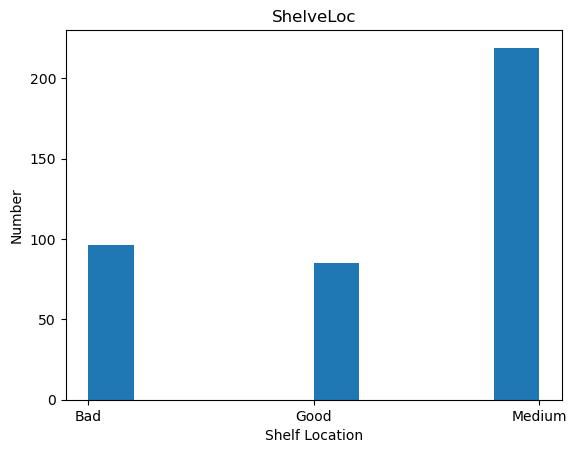

In [41]:
# Create a histogram of a dataset column using Matplotlib
plt.hist(df1['ShelveLoc'])

# Add labels and title to the plot
plt.xlabel('Shelf Location')
plt.ylabel('Number')
plt.title('ShelveLoc')
plt.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

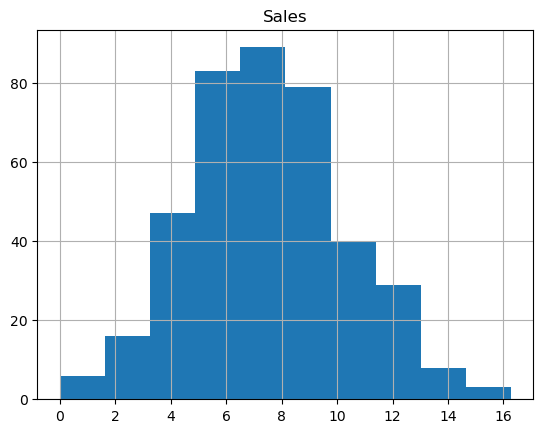

In [42]:
df1.hist('Sales')

<AxesSubplot:xlabel='Sales', ylabel='Advertising'>

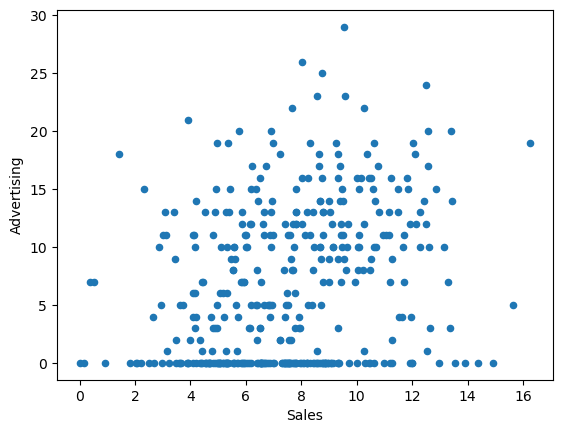

In [43]:
df1.plot(kind="scatter", x="Sales", y="Advertising")

## 2. Split the dataset into your training sample (70%) and test sample (30%)


In [48]:
# Split dataset in features and target variable
feature_cols = ['Sales','CompPrice','Income','Advertising','Population', 'Price','Age','Education']
# Features
X = df1[feature_cols]
# Target variable
y = df1.ShelveLoc
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

No. of training examples: 280
No. of testing examples: 120


In [49]:
X_test

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
330,4.99,122,59,0,501,112,32,14
215,2.34,116,83,15,170,144,71,11
305,8.03,115,29,26,394,132,33,13
326,4.69,133,30,0,152,122,53,17
26,8.33,107,115,11,496,131,50,11
...,...,...,...,...,...,...,...,...
128,4.96,133,100,3,350,126,55,13
46,12.44,127,90,14,16,70,48,15
7,11.85,136,81,15,425,120,67,10
230,5.16,115,60,0,119,114,38,14


## 3. Fit a logistic regression model using the training sample and another regularized model (shrinking the coefficients) to predict "Shelveloc". Compare the accuracy of both models using the test sample. Discuss your results. Hint: for the regularized model use L1-norm (Lasso): LogisticRegression(penalty='l1',...)


In [55]:
# Fit a logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# Fit a regularized logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty = "l2").fit(X, y)

y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

0.85
[[21  0  7]
 [ 0 22  2]
 [ 6  3 59]]
0.85
[[21  0  7]
 [ 0 22  2]
 [ 6  3 59]]


## 4. Fit a linear discriminant analysis model using the training sample and another regularized model (shrinking the coefficients) to predict "Shelveloc". Compare the accuracy of both models using the test sample. Discuss your results. Hint: for the regularized model use the function LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto').



In [51]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X = lda.fit_transform(X, y)
X_test = lda.transform(X_test)


# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X, y)
y_pred = classifier.predict(X_test)

# Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
z = (accuracy_score(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[21  0  7]
 [ 0 22  2]
 [ 3  4 61]]
Accuracy0.8666666666666667


## 5. Fit a quadratic discriminant analysis model using the training sample and another regularized model (shrinking the coefficients) to predict "Shelveloc". Compare the accuracy of both models using the test sample. Discuss your results. Hint: for the regularized model select the proper value for the option reg_param of the QuadraticDiscriminantAnalysis function.


In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score
qda = QDA()
model2 = qda.fit(X, y)
print(model2.priors_)
print(model2.means_)

pred2=model2.predict(X_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

z2 = (accuracy_score(y_test, pred2))

[0.24   0.2125 0.5475]
[[-2.08260185]
 [ 2.71090289]
 [-0.13925556]]
(array(['Bad', 'Good', 'Medium'], dtype=object), array([27, 25, 68], dtype=int64))
[[21  0  6]
 [ 0 22  3]
 [ 7  2 59]]
              precision    recall  f1-score   support

         Bad      0.778     0.750     0.764        28
        Good      0.880     0.917     0.898        24
      Medium      0.868     0.868     0.868        68

    accuracy                          0.850       120
   macro avg      0.842     0.845     0.843       120
weighted avg      0.849     0.850     0.849       120



## 6.  Fit a KNN model with K = 1, 2, 3 using the training sample to predict "Shelveloc". Compare the accuracy of these models using the test sample. Discuss your results.


In [53]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X, y).predict(X_test)
print(classification_report(y_test, pred, digits=3))

#K=2
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
pred = knn.fit(X, y).predict(X_test)
print(classification_report(y_test, pred, digits=3))


#K=3
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X, y).predict(X_test)
print(classification_report(y_test, pred, digits=3))

#Accuracy
z3 = 0.767
z4 = 0.717
z5 = 0.758

              precision    recall  f1-score   support

         Bad      1.000     1.000     1.000        28
        Good      1.000     1.000     1.000        24
      Medium      1.000     1.000     1.000        68

    accuracy                          1.000       120
   macro avg      1.000     1.000     1.000       120
weighted avg      1.000     1.000     1.000       120

              precision    recall  f1-score   support

         Bad      0.609     1.000     0.757        28
        Good      0.828     1.000     0.906        24
      Medium      1.000     0.662     0.796        68

    accuracy                          0.808       120
   macro avg      0.812     0.887     0.820       120
weighted avg      0.874     0.808     0.809       120

              precision    recall  f1-score   support

         Bad      0.885     0.821     0.852        28
        Good      0.885     0.958     0.920        24
      Medium      0.912     0.912     0.912        68

    accuracy        

C:\Users\beasp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\beasp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## 7. Which of these methods in Parts 3, 4, 5, and 6 appears to provide the best results on this data? You can build a table comparing the accuracy of all the models. Explain your answer





In [56]:
# Create an Empty DataFrame object 
S = pd.DataFrame() 
    
# Append columns to an empty DataFrame 
S['Name'] = ['Logistic', 'LDA', 'QDA', "KNN", "KNN(2)", "KNN(3)"] 
S['Accuracy'] = [score, z, z2, z3, z4, z5] 

print(S)

       Name  Accuracy
0  Logistic  0.850000
1       LDA  0.866667
2       QDA  0.850000
3       KNN  0.767000
4    KNN(2)  0.717000
5    KNN(3)  0.758000


# Question 4

## 1. Write a function in Python to calculate the parameters from a linear regression on a data set of $n$ predictors.  You can assume all the predictors and the prediction is numeric.  Include in the output the standard error of your variables.  You cannot use the function sm.OLS.from_formula() or any of the other built-in regression functions of Python.  

In [57]:
# Write a function in Python to calculate the parameters from a linear regression on a data set of 𝑛 predictors.
import math
def linear_regression(l, m, n):
    l_sum = 0
    m_sum = 0
    l2_sum = 0
    m2_sum = 0
    lm_sum = 0

    for i in range(0, n):
        l_sum = l_sum + l[i]
        m_sum = m_sum + m[i]
        l2_sum = l2_sum + l[i]*l[i]
        m2_sum = m2_sum + m[i]*m[i]
        lm_sum = lm_sum + l[i]*m[i]

    b0 = (n*lm_sum - l_sum*m_sum) / (n*l2_sum - l_sum*l_sum)    
    b1 = (m_sum - b0*l_sum) / n
    
    # Calculate the standard error
    s_error = 0
    for i in range(0, n):
        s_error = s_error + (m[i] - b0*l[i] - b1)**2
        
    s_error = math.sqrt(s_error/n)
    return b0, b1, s_error

l = [1, 3, 5, 15, 28, 92, 95]
m = [1, 4, 6, 17, 25, 60, 68]
n = 7

b0, b1, s_error = linear_regression(l, m, n)

print("b0 =", b0)
print("b1 =", b1)
print("Standard Error =", s_error)

b0 = 0.6553780471009503
b1 = 3.480663820410411
Standard Error = 2.815862040796305


## 2. Compare the output of your function to that of the sm.OLS.from_formula() function.



In [58]:
# Compare the output of the two functions
import statsmodels.api as sm

s = l = [1, 3, 5, 15, 28, 92, 95]
t = [14, 28, 34, 48, 56, 68, 24]
lm = pd.DataFrame({'l': l , 'm': m})

results = sm.OLS.from_formula('l ~ m', lm)
results = results.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      l   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     401.4
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           5.73e-06
Time:                        17:10:49   Log-Likelihood:                -20.094
No. Observations:                   7   AIC:                             44.19
Df Residuals:                       5   BIC:                             44.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8255      2.726     -1.770      0.1

C:\Users\beasp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
